In [6]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
import warnings
from scipy.stats import norm
from scipy import stats
warnings.filterwarnings('ignore')

np.set_printoptions(threshold=np.nan)
pd.set_option('display.max_rows', 2000)

%matplotlib inline
    
df = pd.read_csv("train.csv",na_values=['?',''],delimiter=',',delim_whitespace=False)
df_test = pd.read_csv("test.csv",na_values=['?',''],delimiter=',',delim_whitespace=False)

print(df.shape)
print(df_test.shape)
#print(df.head())
#print(df.describe())
#print(df.dtypes)
#df = df.dropna()



from sklearn.preprocessing import Imputer


########################Dealing with missing values

#missing data
# total = df.isnull().sum().sort_values(ascending=False)
# percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# print(missing_data.head(20))

data_aux = df.append(df_test)


print("Missing values before remove NA: " , data_aux.columns[data_aux.isnull().any()])

#[data_aux[i].fillna(inplace=True,value='No') for i in data_aux.columns if data_aux[i].dtype==np.object  ]

#Alley
data_aux.Alley.fillna(inplace=True,value='No')

#BsmtQual
data_aux.BsmtQual.fillna(inplace=True,value='No')

#BsmtCond
data_aux.BsmtCond.fillna(inplace=True,value='No')

#BsmtExposure
data_aux.BsmtExposure.fillna(inplace=True,value='No')

#BsmtFinType1
data_aux.BsmtFinType1.fillna(inplace=True,value='No')

#BsmtFinType2
data_aux.BsmtFinType2.fillna(inplace=True,value='No')

#FireplaceQu
data_aux.FireplaceQu.fillna(inplace=True,value='No')    

#GarageType
data_aux.GarageType.fillna(inplace=True,value='No')

#GarageFinish
data_aux.GarageFinish.fillna(inplace=True,value='No')

#GarageQual 
data_aux.GarageQual.fillna(inplace=True,value='No')
    
#GarageCond
data_aux.GarageCond.fillna(inplace=True,value='No')

#PoolQC
data_aux.PoolQC.fillna(inplace=True,value='No')
    
#Fence
data_aux.Fence.fillna(inplace=True,value='No')

#MiscFeature
data_aux.MiscFeature.fillna(inplace=True,value='No')
    
print("Missing values after insert No, i.e., real missing values: " , data_aux.columns[data_aux.isnull().any()])

    
#Numeric fields    
#imp = Imputer(missing_values='NaN', strategy='mean', axis=1)  - insert the mean   
    
#BsmtFinSF1
#df.dropna(axis=0,subset=['BsmtFinSF1'],inplace=True)
#df['BsmtFinSF1'] = imp.fit_transform(df['BsmtFinSF1'].reshape(1,-1)).transpose()    
data_aux.BsmtFinSF1.fillna(inplace=True,value=0)
    
#BsmtFinSF2
#df.dropna(axis=0,subset=['BsmtFinSF2'],inplace=True)
#df['BsmtFinSF2'] = imp.fit_transform(df['BsmtFinSF2'].reshape(1,-1)).transpose()    
data_aux.BsmtFinSF2.fillna(inplace=True,value=0)
    
#BsmtUnfSF
#df.dropna(axis=0,subset=['BsmtUnfSF'],inplace=True)
#df.drop('BsmtUnfSF',axis=1,inplace=True)
#df['BsmtUnfSF'] = imp.fit_transform(df['BsmtUnfSF'].reshape(1,-1)).transpose()    
data_aux.BsmtUnfSF.fillna(inplace=True,value=0)
    
#TotalBsmtSF
#df.dropna(axis=0,subset=['TotalBsmtSF'],inplace=True)
#df['TotalBsmtSF'] = imp.fit_transform(df['TotalBsmtSF'].reshape(1,-1)).transpose()    
data_aux.TotalBsmtSF.fillna(value=0,inplace=True)
    
#BsmtFullBath - apenas na base de teste tem NA.Nao posso remover a linha
#df['BsmtFullBath'] = imp.fit_transform(df['TotalBsmtSF'].reshape(1,-1)).transpose()    
data_aux.BsmtFullBath.fillna(inplace=True,value=0)
    
#BsmtHalfBath- apenas na base de teste tem NA.Nao posso remover a linha
#df['BsmtHalfBath'] = imp.fit_transform(df['BsmtHalfBath'].reshape(1,-1)).transpose()    
data_aux.BsmtHalfBath.fillna(inplace=True,value=0)
        
#GarageCars
#df.dropna(axis=0,subset=['GarageCars'],inplace=True)
#df['GarageCars'] = imp.fit_transform(df['GarageCars'].reshape(1,-1)).transpose()    
data_aux.GarageCars.fillna(value=0,inplace=True)
    
#GarageArea
#df.dropna(axis=0,subset=['GarageArea'],inplace=True)
#df['GarageArea'] = imp.fit_transform(df['GarageArea'].reshape(1,-1)).transpose()    
data_aux.GarageArea.fillna(value=0,inplace=True)
        
#LotFrontage 
data_aux['LotFrontage'].fillna(inplace=True,value=0)
    
#GarageYrBlt - remove the hole column
data_aux.GarageYrBlt.fillna(inplace=True,value=0)
   
#MasVnrArea 
data_aux.MasVnrArea.fillna(inplace=True,value=0)
    
#####Categorial fields


#KitchenQual
data_aux.KitchenQual = data_aux.KitchenQual.mode()[0]

#Functional
data_aux.Functional = data_aux.Functional.mode()[0]

#Utilities
data_aux.Utilities = data_aux.Utilities.mode()[0]  
    
#SaleType
data_aux.SaleType  = data_aux.SaleType.mode()[0]
    
#Exterior1st- nao posso remover linhas do teste
data_aux.Exterior1st = data_aux.Exterior1st.mode()[0]

#Exterior2nd
data_aux.Exterior2nd = data_aux.Exterior2nd.mode()[0]       

#Electrical - remove the records where the value is NA
data_aux.Electrical = df['Electrical'].mode()[0]

#MSZoning   - tem NA apenas na base de teste. Como nao posso remover linhas removo a coluna   
data_aux.MSZoning = data_aux.MSZoning.mode()[0]
     
#MasVnrType - remove the records where the value is NA 
data_aux.MasVnrType=df['MasVnrType'].mode()[0]


print("Missing values after all: " , data_aux.columns[data_aux.isnull().any()])

########## End handle missing values


# MSSubClass as str
data_aux['MSSubClass'] = data_aux['MSSubClass'].astype("str")
#After converting this column to String, it will be treated as categorical
    
# Converting OverallCond to str
data_aux.OverallCond = data_aux.OverallCond.astype("str")
    
# KitchenAbvGr to categorical
data_aux['KitchenAbvGr'] = data_aux['KitchenAbvGr'].astype("str")
    
# Year and Month to categorical
data_aux['YrSold'] = data_aux['YrSold'].astype("str")
data_aux['MoSold'] = data_aux['MoSold'].astype("str")    

########################End dealing with missing values


# The OneHotEncoder converts features represented as numeric codes (so they are values that can't be ordered)
#to their binary representation
#enc = preprocessing.OneHotEncoder() 
#df = enc.fit_transform(df)


########################Tratando campos nominais

#vec = DictVectorizer()
#aux = np.asmatrix(vec.fit_transform(df.transpose().to_dict().values()).toarray())
#data_train = pd.DataFrame(aux,columns=vec.feature_names_)
#data_train = pd.get_dummies(df)


################################################# Base de teste

#vec = DictVectorizer()
#aux_test = vec.fit_transform(df_test.transpose().to_dict().values()).toarray()
#data_test = pd.DataFrame(aux_test,columns=vec.feature_names_)
#data_test = pd.get_dummies(df_test) 


data_final = pd.get_dummies(data_aux)

data_train = data_final.iloc[:-df_test.shape[0],:]
data_train.to_csv('train_no_categorical.csv')
print("New shape train:" , np.shape(data_train))
print("Indice da coluna SalePrice no novo dataset" , data_train.columns.get_loc('SalePrice'))

data_test = data_final.iloc[df.shape[0]:,:]

data_test.to_csv('test_no_categorical.csv')
data_test.drop('SalePrice',inplace=True,axis=1)
print("New shape test:" , np.shape(data_test))

#Valores numericos que continham NA sao detectados como String. Assim, depois que removemos o NA temos que setar corretamente 
#o tipo 
#df_test.BsmtFullBath = df_test.BsmtFullBath.astype("int64")
#df_test.BsmtHalfBath = df_test.BsmtHalfBath.astype("int64")
#df_test.GarageCars = df_test.GarageCars.astype("int64")
#df_test.GarageArea = df_test.GarageArea.astype("int64")

print("Null values treino \n", data_train.columns[data_train.isnull().any()])
print("Null values test \n", data_test.columns[data_test.isnull().any()])


print("Colunas que existem apenas teste : " , data_test.columns.difference(data_train.columns))
print("Colunas que existem apenas treino : " , data_train.columns.difference(data_test.columns))


(1460, 81)
(1459, 80)
Missing values before remove NA:  Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'PoolQC', 'SalePrice', 'SaleType', 'TotalBsmtSF',
       'Utilities'],
      dtype='object')
Missing values after insert No, i.e., real missing values:  Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'KitchenQual', 'LotFrontage', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'SalePrice', 'SaleType', 'TotalBsmtSF',
       '

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


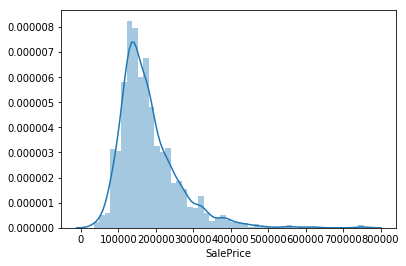

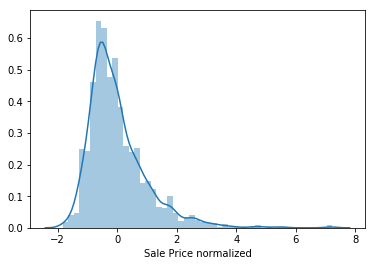

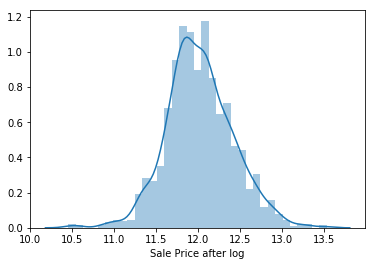

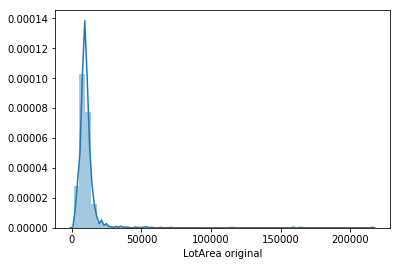

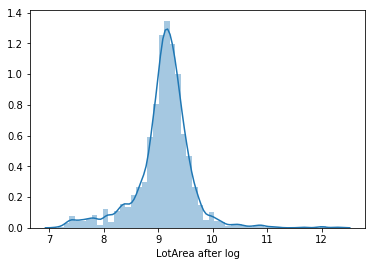

In [7]:
print(data_train.SalePrice.describe())

sns.distplot(data_train['SalePrice']);
#plt.hist(data_train['SalePrice'],bins=50,label="SalePrice original")
plt.show()
saleprice_scaled = preprocessing.StandardScaler().fit_transform((data_train['SalePrice'][:,np.newaxis]));
sns.distplot(saleprice_scaled,axlabel="Sale Price normalized")
#plt.hist(saleprice_scaled,bins=50,label="SalePrice normalized")
plt.show()
saleprice_log = np.log(data_train['SalePrice'])
sns.distplot(saleprice_log,axlabel="Sale Price after log")
#plt.hist(saleprice_log,bins=50,label="SalePrice after log transformation")
plt.show()
sns.distplot(data_train['LotArea'],axlabel="LotArea original")
#plt.hist(data_train['LotArea'],bins=50,label="LotArea original")
plt.show()
sns.distplot(np.log(data_train['LotArea']),axlabel="LotArea after log")
#plt.hist(np.log(data_train['LotArea']),bins=50,label="LotArea after log")


#data_train['SalePrice'] = np.log1p(data_train['SalePrice'])
#data_train['OverallQual'] = np.log1p(data_train['OverallQual'])
#data_train['LotArea'] = np.log1p(data_train['LotArea'])
#data_test['OverallQual'] = np.log1p(data_test['OverallQual'])
#data_test['LotArea'] = np.log1p(data_test['LotArea'])



In [8]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df,name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name,x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
    





In [9]:
print("\n Tentativa de selecionar melhores features \n")

from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel


#Removing features with low variance
#print("Original shape: {}".format(np.shape(df.iloc[:,0:-1])))
#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
#features = sel.fit_transform(df.iloc[:,0:-1])
#print("Shape apos Removing features with low variance {}".format(np.shape(features))) #nenhuma foi selecionada 
#print("\n")

#Tree-based feature selection
y_train = (data_train['SalePrice'])
x_train = (data_train.drop('SalePrice',axis=1))

print()

clf = ExtraTreesRegressor(n_estimators=20)
clf = clf.fit(x_train,y_train)
data = np.zeros((1,x_train.shape[1])) 
data = pd.DataFrame(data, columns=x_train.columns)
data.iloc[0] = clf.feature_importances_
data = data.T.sort_values(df.index[0], ascending=False).T


print("As features selecionadas com Tree-based feature selection foram: \n")
yyy = np.asarray((data.columns[0:27]))
xxx = np.asarray((data.iloc[:,0:27]))
print(yyy)
print(xxx)

model = SelectFromModel(clf, prefit=True)
aux = model.transform(x_train)

print("\n New shape train apos Tree-based feature selection: {}".format(aux.shape))

print("\n Fim tentativa selecionar melhores features \n")


data_train_less_features = pd.concat([pd.DataFrame(aux),pd.DataFrame(y_train)],axis=1)
data_train_less_features.to_csv('data_train_less_features.csv')


aux = model.transform((data_test))
data_test_less_features = pd.DataFrame(aux)
print("\n New shape test apos Tree-based feature selection: {}".format(aux.shape))
data_test_less_features.to_csv('data_test_less_features.csv')


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split




 Tentativa de selecionar melhores features 


As features selecionadas com Tree-based feature selection foram: 

['ExterQual_TA' 'OverallQual' 'GarageCars' 'GrLivArea' 'BsmtQual_Ex'
 'Neighborhood_NoRidge' 'FullBath' 'FireplaceQu_No' 'TotalBsmtSF'
 '1stFlrSF' 'Fireplaces' 'TotRmsAbvGrd' 'BsmtFinSF1' '2ndFlrSF'
 'MSSubClass_60' 'GarageArea' 'LotArea' 'YearBuilt' 'BedroomAbvGr'
 'YearRemodAdd' 'BsmtQual_Gd' 'BsmtFullBath' 'BsmtExposure_Gd'
 'BldgType_1Fam' 'GarageType_Attchd' 'BsmtFinType1_GLQ' 'OpenPorchSF']
[[ 0.2408171   0.18377257  0.11324721  0.06365764  0.06111069  0.02642248
   0.02573284  0.02159666  0.01418577  0.01289043  0.01171981  0.01047565
   0.00962736  0.00773749  0.00756748  0.00588492  0.00579478  0.0055606
   0.00550046  0.00514962  0.00486093  0.00473174  0.00461507  0.00426354
   0.00383763  0.0036493   0.00323782]]

 New shape train apos Tree-based feature selection: (1460, 26)

 Fim tentativa selecionar melhores features 


 New shape test apos Tree-based feature

In [10]:
#Starting making predictors

from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, Lasso, LassoCV, ElasticNetCV

#Caso 1 - Linear Regression 
print("Linear Regression ")

# Shuffle
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)


#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))

classifier = LinearRegression()
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


print("\n\n")
print("SGDRegressor \n\n")


classifier = SGDRegressor()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


print("\n\n")
print("Ridge \n\n")


classifier = RidgeCV()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


print("\n\n")
print("Lasso \n\n")


classifier = LassoCV()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


print("\n\n")
print("Elastic Net \n\n")


classifier = ElasticNetCV()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    



###########Less features

print("\n\n Less Features")
print("Linear Regression \n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifierLinearRegression = LinearRegression()
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
    pred = []    
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifierLinearRegression = classifierLinearRegression.fit(x_train_fold, y_train_fold)
    pred = classifierLinearRegression.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifierLinearRegression.score(X=x_test_fold,y=y_test_fold))

  
#Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# Write the cross-validated prediction
pred = []
pred = np.array(pred)
pred = classifierLinearRegression.predict(scaler.transform(data_test_less_features))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_LinearRegression.csv', index =False)  

#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_LinearRegression.csv', columns=['SalePrice'])




print("\n\n")
print("SGDRegressor \n\n")

classifier = SGDRegressor()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

print("\n\n")
print("Ridge \n\n")


classifier = RidgeCV()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


Linear Regression 
Fold #1
Fold score (RMSE): 145730084120619904.00
Accuracy: -2768755440662166867279872.000
Fold #2
Fold score (RMSE): 541894250607908416.00
Accuracy: -43188382975741573889785856.000
Fold #3
Fold score (RMSE): 785669996563605248.00
Accuracy: -111731239158676481059586048.000
Fold #4
Fold score (RMSE): 317756280685420096.00
Accuracy: -16080168858426199320297472.000
Fold #5
Fold score (RMSE): 494403507850271616.00
Accuracy: -46765102355313273249726464.000

 Average RMSE: 5.0548350363778445e+17



SGDRegressor 


Fold #1
Fold score (RMSE): 5041914.12
Accuracy: -3313.187
Fold #2
Fold score (RMSE): 8767522.52
Accuracy: -11304.548
Fold #3
Fold score (RMSE): 413741.98
Accuracy: -29.985
Fold #4
Fold score (RMSE): 1156826.81
Accuracy: -212.127
Fold #5
Fold score (RMSE): 354596.28
Accuracy: -23.056

 Average RMSE: 4559068.289399623



Ridge 


Fold #1
Fold score (RMSE): 29610.24
Accuracy: 0.886
Fold #2
Fold score (RMSE): 28297.91
Accuracy: 0.882
Fold #3
Fold score (RMSE): 53122.7

In [11]:
#Caso 3 - SVM
from sklearn.svm import SVR
from sklearn.svm import NuSVR

print("SVM")

# Shuffle
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)

#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))
x_train = np.ascontiguousarray(x_train)


classifier = SVR(kernel='linear', C=1e4) #34761.27693615821
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))

###########Less features
print("\n\n Less features \n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))
x_train = np.ascontiguousarray(x_train)


#classifier = SVR(kernel='rbf', C=1e3, gamma=0.1) #66483.84692815947
classifierSVR = SVR(kernel='linear', C=1e4) #34761.27693615821
#classifier = SVR(kernel='poly', C=1e3, degree=3) #86747.4465877091
#classifier = NuSVR(C=1e3) #57249.1589623674

kf = KFold(10, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifierSVR = classifierSVR.fit(x_train_fold, y_train_fold)
    pred = classifierSVR.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifierSVR.score(X=x_test_fold,y=y_test_fold))

    

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# Write the cross-validated prediction
pred = []
pred = np.array(pred)
pred = classifierSVR.predict(scaler.transform(data_test_less_features))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_SVR.csv', index =False)  

#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_SVR.csv', columns=['SalePrice'])



SVM
Fold #1
Fold score (RMSE): 26826.50
Accuracy: 0.865
Fold #2
Fold score (RMSE): 43555.14
Accuracy: 0.770
Fold #3
Fold score (RMSE): 28864.73
Accuracy: 0.864
Fold #4
Fold score (RMSE): 34504.30
Accuracy: 0.799
Fold #5
Fold score (RMSE): 28409.13
Accuracy: 0.858

 Average RMSE: 33007.603257530136


 Less features 

Fold #1
Fold score (RMSE): 23379.06
Accuracy: 0.882
Fold #2
Fold score (RMSE): 29616.75
Accuracy: 0.861
Fold #3
Fold score (RMSE): 23060.24
Accuracy: 0.915
Fold #4
Fold score (RMSE): 42212.63
Accuracy: 0.740
Fold #5
Fold score (RMSE): 36596.01
Accuracy: 0.855
Fold #6
Fold score (RMSE): 32337.97
Accuracy: 0.823
Fold #7
Fold score (RMSE): 25594.03
Accuracy: 0.873
Fold #8
Fold score (RMSE): 25426.02
Accuracy: 0.870
Fold #9
Fold score (RMSE): 59377.65
Accuracy: 0.564
Fold #10
Fold score (RMSE): 25816.39
Accuracy: 0.873

 Average RMSE: 34082.47855844345


In [12]:
from sklearn.neural_network import MLPRegressor

# Shuffle
print("NN MLPRegressor")
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)


#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,4,2), random_state=1)
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))

###########Less features
print("\n\n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,2), random_state=1)
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


NN MLPRegressor
Fold #1
Fold score (RMSE): 36599.65
Accuracy: 0.692
Fold #2
Fold score (RMSE): 40950.35
Accuracy: 0.793
Fold #3
Fold score (RMSE): 34314.48
Accuracy: 0.818
Fold #4
Fold score (RMSE): 84337.60
Accuracy: -0.031
Fold #5
Fold score (RMSE): 38195.94
Accuracy: 0.735

 Average RMSE: 50528.62589610206



Fold #1
Fold score (RMSE): 26917.00
Accuracy: 0.869
Fold #2
Fold score (RMSE): 40818.55
Accuracy: 0.746
Fold #3
Fold score (RMSE): 37005.57
Accuracy: 0.819
Fold #4
Fold score (RMSE): 27301.30
Accuracy: 0.853
Fold #5
Fold score (RMSE): 50106.43
Accuracy: 0.626

 Average RMSE: 37459.59535548167


In [13]:
##Random Forests
from sklearn.ensemble import RandomForestRegressor

# Shuffle
print("Random Forests")
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(data_train.drop('SalePrice',axis=1), data_train['SalePrice'], 
                                                    test_size=0.20, random_state=42)

classifierAllFeatures = RandomForestRegressor(n_estimators=60,oob_score=True)

classifierAllFeatures.fit(x_train, y_train)

# The mean squared error
pred = classifierAllFeatures.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error using all features and no normalization: {}".format(score))
# Evaluate success using accuracy
print("Accuracy using all features and no normalization: %.3f" % classifierAllFeatures.score(X=x_test,y=y_test))
print("\n\n")


y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))

#classifier = RandomForestRegressor(n_estimators=1000,oob_score=True)

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    #print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifierAllFeatures.fit(x_train_fold, y_train_fold)
    pred = classifierAllFeatures.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    #print("Fold score (RMSE): {}".format(score))

    # Evaluate success using accuracy
    #print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE using all features, cross validation and normalizing: {}".format(score))    
print("\n oob score using all features cross validation and normalizing: {}".format(classifierAllFeatures.oob_score_))    

# Write the cross-validated prediction
pred = []
pred = np.array(pred,dtype='int64')
pred = classifierAllFeatures.predict(scaler.transform(data_test))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_RF_full_features.csv', index =False)  

#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_RF_full_features.csv', columns=['SalePrice'])

###########Less features
print("\n\n Less features \n\n")

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(data_train_less_features.drop('SalePrice',axis=1), 
                                    data_train_less_features['SalePrice'], test_size=0.20, random_state=42)

classifierRF_lessFeatures = RandomForestRegressor(n_estimators=60,oob_score=True)

classifierRF_lessFeatures.fit(x_train, y_train)

# The mean squared error
pred = classifierRF_lessFeatures.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error using less features and no normalization: {}".format(score))
# Evaluate success using accuracy
print("Accuracy using less features and no normalization: %.3f" % classifierRF_lessFeatures.score(X=x_test,y=y_test))
print("\n\n")


y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))

kf = KFold(n_splits=5, random_state=7)    

oos_y = []
oos_pred = []
fold = 0
pred = []

#classifierRandomForestRegressor = RandomForestRegressor(n_estimators=1000,oob_score=True,max_depth=3)

for training, test in kf.split(x_train):
    fold+=1
    #print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifierRF_lessFeatures.fit(x_train_fold, y_train_fold)
    pred = classifierRF_lessFeatures.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    #print("Fold score (RMSE): {}".format(score))

    # Evaluate success using accuracy
    #print("Accuracy: %.3f" % classifierRandomForestRegressor.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE (corss) less features, normalizing: {}".format(score))    
print("\n oob score (cross) less features, normalizing: {}".format(classifierRF_lessFeatures.oob_score_))    


# Write the cross-validated prediction
pred = []
pred = np.array(pred,dtype='int64')
pred = classifierRF_lessFeatures.predict(scaler.transform(data_test_less_features))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_RF_less_features.csv', index =False)  

#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_RF_less_features.csv', columns=['SalePrice'])




Random Forests
Mean squared error using all features and no normalization: 26729.233117968895
Accuracy using all features and no normalization: 0.890




 Average RMSE using all features, cross validation and normalizing: 32716.958935719347

 oob score using all features cross validation and normalizing: 0.8807344778404586


 Less features 


Mean squared error using less features and no normalization: 28105.35510330883
Accuracy using less features and no normalization: 0.897




 Average RMSE (corss) less features, normalizing: 30135.41699261126

 oob score (cross) less features, normalizing: 0.8484580923352485


In [14]:
from sklearn.ensemble import GradientBoostingRegressor


# Shuffle
np.random.seed(42)
data_train_less_features = data_train_less_features.reindex(np.random.permutation(data_train_less_features.index))
data_train_less_features.reset_index(inplace=True, drop=True)

y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))


# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.20, random_state=42)



classifierGBR = GradientBoostingRegressor(n_estimators=1100, learning_rate=0.05, 
                                               min_samples_leaf=25, min_samples_split=20, loss='huber').fit(x_train, y_train)

# The mean squared error
pred = classifierGBR.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error: {}".format(score))
# Evaluate success using accuracy
print("Accuracy: %.3f" % classifierGBR.score(X=x_test,y=y_test))
print("\n\n")



# Shuffle
np.random.seed(42)
data_train_less_features = data_train_less_features.reindex(np.random.permutation(data_train_less_features.index))
data_train_less_features.reset_index(inplace=True, drop=True)

y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))


# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.20, random_state=43)

classifierGBR.fit(x_train, y_train)

# The mean squared error
pred = classifierGBR.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error: {}".format(score))
# Evaluate success using accuracy
print("Accuracy: %.3f" % classifierGBR.score(X=x_test,y=y_test))
print("\n\n")

#save the contest result 
predGBR = []
predGBR = np.array(pred,dtype='int64')
predGBR = classifierGBR.predict(scaler.transform(data_test_less_features))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': predGBR}).to_csv('pred_GBR.csv', index =False)  

#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_GBR.csv', columns=['SalePrice'])



Mean squared error: 25839.78258534936
Accuracy: 0.875



Mean squared error: 27951.50380130063
Accuracy: 0.888





In [15]:
import tensorflow as tf

import tensorflow.contrib.learn as learn
import shutil 
import os

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

# Set the desired TensorFlow output level for this example
tf.logging.set_verbosity(tf.logging.ERROR)

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df,target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)

    # find out the type of the target column.  Is it really this hard? :(
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        return df.as_matrix(result).astype(np.float32),df.as_matrix([target]).astype(np.int32)
    else:
        # Regression
        return df.as_matrix(result).astype(np.float32),df.as_matrix([target]).astype(np.float32)


    # Get a new directory to hold checkpoints from a neural network.  This allows the neural network to be
# loaded later.  If the erase param is set to true, the contents of the directory will be cleared.
def get_model_dir(name,erase=False):
    base_path = os.path.join(".","dnn")
    model_dir = os.path.join(base_path,name)
    os.makedirs(model_dir,exist_ok=True)
    if erase and len(model_dir)>4 and os.path.isdir(model_dir):
        shutil.rmtree(model_dir,ignore_errors=True) # be careful, this deletes everything below the specified path
    return model_dir


#Normalization
# y_train = ((data_train['SalePrice']))
# x_train = (data_train.drop('SalePrice',axis=1))
# scaler = preprocessing.StandardScaler().fit((x_train))
# x_train_scaled = scaler.transform((x_train))



#Normalization
#x_train,y_train = to_xy(data_train_less_features,"SalePrice")
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


#Choose an optimizer
#opt=tf.train.AdamOptimizer(learning_rate=0.01)
#opt=tf.train.MomentumOptimizer(learning_rate=0.001,momentum=0.9)

feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x_train.shape[1])]
classifierDNN = learn.DNNRegressor(
                                    #hidden_units=[200,100, 80, 80, 50, 50, 80,80], 
                                    hidden_units=[ 80, 80, 20], 
                                   feature_columns=feature_columns,
                                   model_dir=get_model_dir("dnn",True)
                                   #optimizer=opt
                                  )


kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    # Early stopping
    validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
    x_test_fold,
    y_test_fold,
    every_n_steps=500,
    #metrics=validation_metrics,
    early_stopping_metric="loss",
    early_stopping_metric_minimize=True,
    early_stopping_rounds=400)
        
    classifierDNN.fit(x_train_fold, y_train_fold, monitors=[validation_monitor] ,steps=1000)
    pred = (list(classifierDNN.predict(x_test_fold, as_iterable=True)))
    
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))


# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
print("\n\n")

#Save the contest result
pred = (list(classifierDNN.predict(scaler.transform(data_test_less_features),as_iterable=True)))
#pred = list(classifierDNN.predict(scaler.transform(data_test),as_iterable=True))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_DNN.csv', index =False)  
#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_DNN.csv', columns=['SalePrice'])



Fold #1
Fold score (RMSE): 26726.60
Fold #2
Fold score (RMSE): 39888.30
Fold #3
Fold score (RMSE): 28031.61
Fold #4
Fold score (RMSE): 28767.61
Fold #5
Fold score (RMSE): 22266.95

 Average RMSE: 29713.805338685554





In [16]:
# Voting Ensemble for Classification
from sklearn.ensemble import VotingClassifier

y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))

# estimators = []
# estimators.append(('linear',classifierLinearRegression))
# estimators.append(('svr',classifierSVR))
# estimators.append(('rf',classifierRandomForestRegressor))

# # # create the ensemble model
# ensemble = VotingClassifier(estimators,voting='hard')
# ensemble = ensemble.fit(x_train,y_train)
# pred = []
# pred = np.array(pred,dtype='float64')
# pred = ensemble.predict(scaler.transform(data_test_less_features))
# result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
# result.to_csv('pred_EnsembleVoting.csv', columns=['SalePrice'])


#Emsemble via stacking
from mlxtend.regressor import StackingRegressor

stregr = StackingRegressor(regressors=[classifierLinearRegression
                                       ,classifierSVR
                                       ,classifierRF_lessFeatures
                                       ,classifierGBR], 
                           meta_regressor=classifierLinearRegression)
stregr.fit(x_train,y_train)
pred = []
pred = np.array(pred)
pred = stregr.predict(scaler.transform(data_test_less_features))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_EnsembleStacker.csv', index =False)  

#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_EnsembleStacker.csv', columns=['SalePrice'])


#Emsemble via avereging
dnn=[]
#dnn = list(classifierDNN.predict(scaler.transform(data_test_less_features),as_iterable=True))

final_labels = (
                (classifierLinearRegression.predict(scaler.transform(data_test_less_features)))  
                + (classifierSVR.predict(scaler.transform(data_test_less_features))) 
                + (classifierRF_lessFeatures.predict(scaler.transform(data_test_less_features)))
                + (classifierGBR.predict(scaler.transform(data_test_less_features)))                 
                #+ dnn
               
               ) / 4

## Saving to CSV
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': final_labels}).to_csv('pred_EnsembleAvereging.csv', index =False)  

print("Finished")

Finished
